In [ ]:
#Part for 2.1
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)


Training data shape: (48000, 28, 28)
Validation data shape: (12000, 28, 28)
Test data shape: (10000, 28, 28)


Class Distribution: {0: 4738, 1: 5394, 2: 4766, 3: 4905, 4: 4674, 5: 4337, 6: 4734, 7: 5012, 8: 4681, 9: 4759}


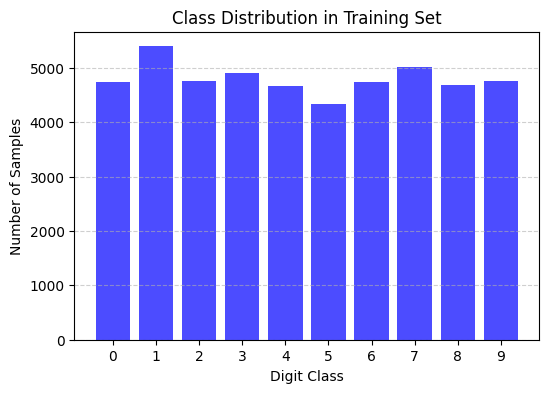

In [ ]:
#Part for 2.2

#Class Distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color="blue", alpha=0.7)
plt.xlabel("Digit Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.xticks(unique)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [ ]:
#Part for 2.2

#Basic Statistics

print("Mean pixel value: ",np.mean(x_train))
print("Standard deviation :", np.std(x_train))

Mean pixel value:  33.35111325467687
Standard deviation : 78.60129135177951


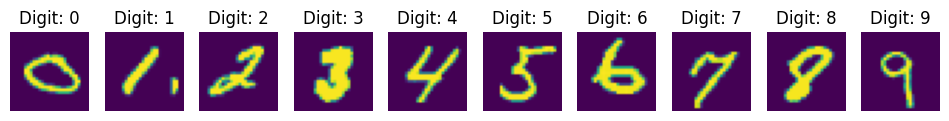

In [ ]:
#Part for 2.2

#Visualization

fig, axes = plt.subplots(1, 10, figsize=(12, 4))

for i, ax in enumerate(axes):
  idx = np.where(y_train == i)[0][0]
  ax.imshow(x_train[idx])
  ax.set_title(f"Digit: {i}")
  ax.axis("off")
plt.show()

In [ ]:
#Part for 2.3/Normalization using Numpy
x_train_scaled = x_train / 255.0
x_val_scaled = x_val / 255.0
x_test_scaled = x_test / 255.0

print("\nMean after NumPy normalization (should be ~0):", np.mean(x_train_scaled))
print("Std after NumPy normalization (should be ~1):", np.std(x_train_scaled))


Mean after NumPy normalization (should be ~0): 0.13078867943010575
Std after NumPy normalization (should be ~1): 0.30824035824227297


In [ ]:
#Part for 3.1

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print('X_train Shape:', x_train.shape)
print('X_train_flat Shape:', x_train_flat.shape)

X_train Shape: (48000, 28, 28)
X_train_flat Shape: (48000, 784)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]
metrics = ["euclidean", "manhattan"]
best_k, best_metric = None, None
best_accuracy = 0
val_accuracies = []


for k in k_values:
  for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(x_train_flat, y_train)
    y_val_pred = knn.predict(x_val_flat)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append((k, metric, val_accuracy))
    print(f"k={k}, metric={metric} -> Validation Accuracy: {val_accuracy:.4f}")
    if val_accuracy > best_accuracy:
            best_k = k
            best_metric = metric
            best_accuracy = val_accuracy
print(f"\nBest k={best_k}, Best metric={best_metric}, Best Validation Accuracy: {best_accuracy:.4f}")

k=1, metric=euclidean -> Validation Accuracy: 0.9704
k=1, metric=manhattan -> Validation Accuracy: 0.9644
k=3, metric=euclidean -> Validation Accuracy: 0.9703
k=3, metric=manhattan -> Validation Accuracy: 0.9633
k=5, metric=euclidean -> Validation Accuracy: 0.9675
k=5, metric=manhattan -> Validation Accuracy: 0.9620
k=7, metric=euclidean -> Validation Accuracy: 0.9663
k=7, metric=manhattan -> Validation Accuracy: 0.9604
k=9, metric=euclidean -> Validation Accuracy: 0.9654
k=9, metric=manhattan -> Validation Accuracy: 0.9584

Best k=1, Best metric=euclidean, Best Validation Accuracy: 0.9704


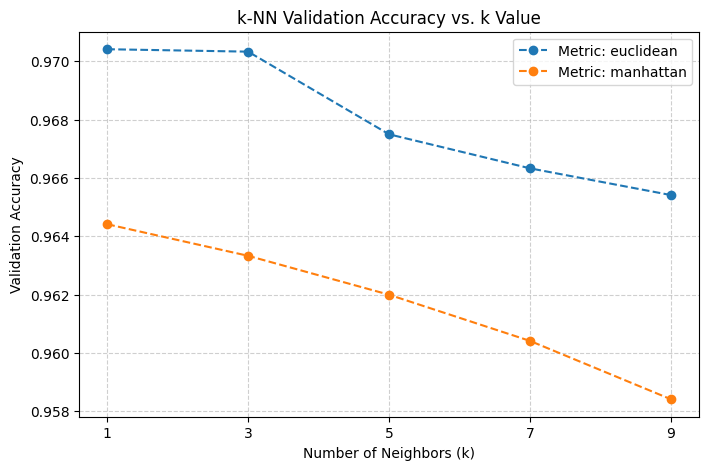

In [ ]:
plt.figure(figsize=(8, 5))
for metric in metrics:
    metric_vals = [val[2] for val in val_accuracies if val[1] == metric]
    plt.plot(k_values, metric_vals, marker='o', linestyle='dashed', label=f'Metric: {metric}')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Validation Accuracy vs. k Value")
plt.xticks(k_values)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [ ]:
#part for 3.2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
x_train_final = np.concatenate((x_train_flat, x_val_flat), axis=0)
y_train_final = np.concatenate((y_train, y_val), axis=0)

final_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_knn.fit(x_train_final, y_train_final)

y_test_pred = final_knn.predict(x_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

Test Accuracy with Best Hyperparameters: 0.9691


In [ ]:
print("\nClassification Report for k-NN:")
print(classification_report(y_test, y_test_pred))


Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Confusion Matrix for KNN:
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]


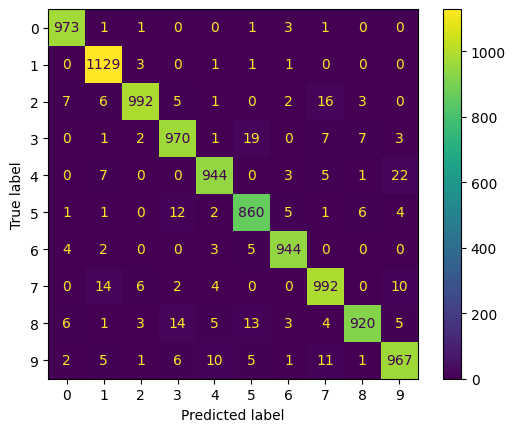

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_knn = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for KNN:")
print(cm_knn)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)

In [ ]:
most_misclassified = np.argsort(np.sum(cm_knn, axis=1) - np.diag(cm_knn))[-3:]
print("\nMost Misclassified Digits:", most_misclassified)


Most Misclassified Digits: [3 9 8]


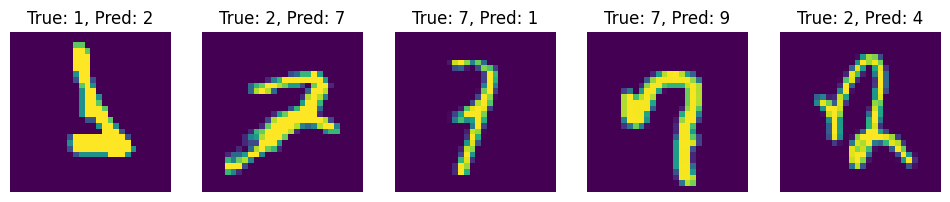

In [ ]:
misclassified_idx = np.where(y_test != y_test_pred)[0]
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    idx = np.random.choice(misclassified_idx)
    ax.imshow(x_test[idx])
    ax.set_title(f"True: {y_test[idx]}, Pred: {y_test_pred[idx]}")
    ax.axis("off")
plt.show()

In [ ]:
#part for 4.1
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

param_grid = {
  'max_depth': [2, 5, 10],
  'min_samples_split': [2, 5]
}
grid_search_cv = 3
tree_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=tree_classifier,
    param_grid=param_grid,
    cv=grid_search_cv,
    scoring='accuracy',
)


grid_search.fit(x_train_final, y_train_final)
print("\nAll Hyperparameter Combinations and Their Accuracies:")
results = grid_search.cv_results_
all_results = []

for mean_score, params in zip(results["mean_test_score"], results["params"]):
    max_depth = params["max_depth"]
    min_samples_split = params["min_samples_split"]
    print(f"Max Depth: {max_depth:>2}, Min Samples Split: {min_samples_split:>2} → Validation Accuracy: {mean_score:.4}")
    all_results.append((max_depth, min_samples_split, mean_score))

best_max_depth = grid_search.best_params_["max_depth"]
best_min_samples_split = grid_search.best_params_["min_samples_split"]
best_accuracy = grid_search.best_score_

print(f"\nBest Hyperparameters: Max Depth: {best_max_depth}, Min Samples Split: {best_min_samples_split}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")



All Hyperparameter Combinations and Their Accuracies:
Max Depth:  2, Min Samples Split:  2 → Validation Accuracy: 0.3399
Max Depth:  2, Min Samples Split:  5 → Validation Accuracy: 0.3399
Max Depth:  5, Min Samples Split:  2 → Validation Accuracy: 0.6709
Max Depth:  5, Min Samples Split:  5 → Validation Accuracy: 0.6709
Max Depth: 10, Min Samples Split:  2 → Validation Accuracy: 0.8492
Max Depth: 10, Min Samples Split:  5 → Validation Accuracy: 0.8496

Best Hyperparameters: Max Depth: 10, Min Samples Split: 5
Best Cross-Validation Accuracy: 0.8496


In [ ]:
#part for 4.2

best_tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_tree_classifier.fit(x_train_final, y_train_final)

y_pred_best_tree = best_tree_classifier.predict(x_test_flat)

test_accuracy = accuracy_score(y_test, y_pred_best_tree)
print(f"\nTest Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_best_tree))



Test Accuracy with Best Hyperparameters: 0.8657

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.83      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.83      0.80      0.81       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.79      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



Confusion Matrix for Decision Tree:
[[ 917    1    8    6    6   11    7    5   14    5]
 [   1 1089   12   13    2    5    2    1   10    0]
 [  11   10  863   24   22   11   13   32   35   11]
 [   8    5   38  843    6   49    4   19   20   18]
 [   3    4    7    7  831    9   12    9   29   71]
 [  17    9    3   50   13  714   24    8   32   22]
 [  23    5   13    4   32   21  835    2   21    2]
 [   2   14   24   10   10    5    1  906   11   45]
 [   8   10   30   40   14   25   16    9  793   29]
 [  12    3    7   31   25   13    4   13   35  866]]


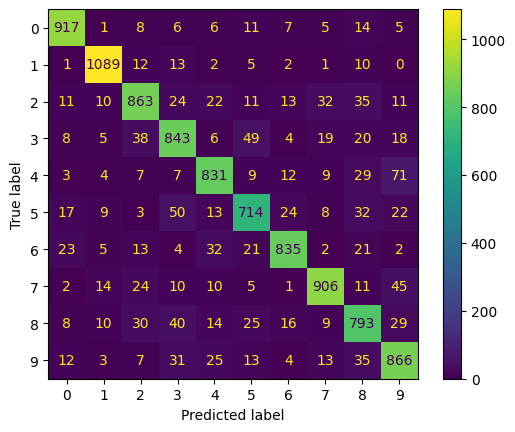

In [ ]:
cm_tree = confusion_matrix(y_test, y_pred_best_tree)
print("Confusion Matrix for Decision Tree:")
print(cm_tree)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_best_tree)

In [ ]:
most_misclassified = np.argsort(np.sum(cm_tree, axis=1) - np.diag(cm_tree))[-3:]
print("\nMost Misclassified Digits:", most_misclassified)


Most Misclassified Digits: [2 5 8]


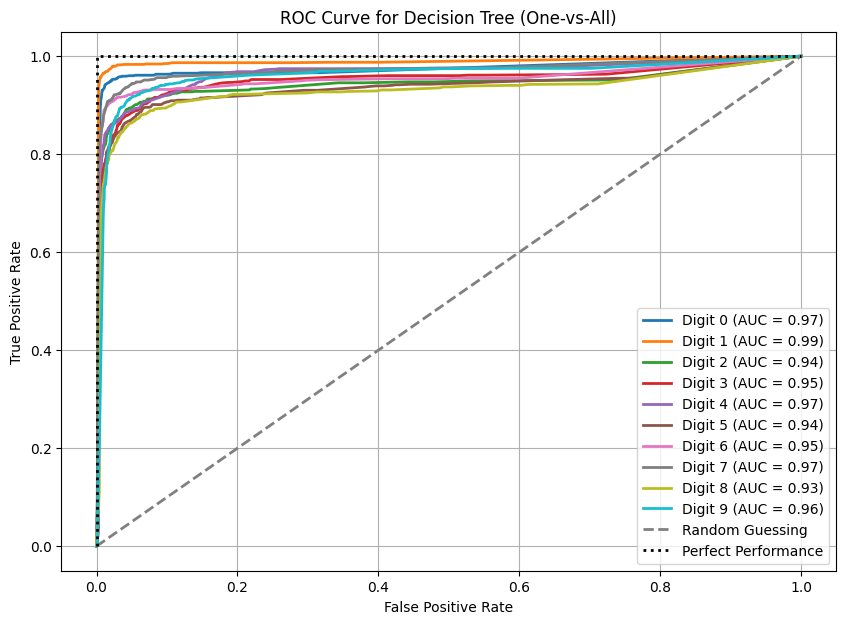

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_pred_prob = best_tree_classifier.predict_proba(x_test_flat)

plt.figure(figsize=(10, 7))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing", lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=":", color="black", label="Perfect Performance", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree (One-vs-All)")
plt.legend(loc="lower right")
plt.grid()
plt.show()